In [7]:
import numpy as np 
import cv2 as cv 
from matplotlib import pyplot as plt

In [8]:
import cv2

# Load the image
image = cv2.imread('exp1.webp', cv2.IMREAD_GRAYSCALE)

# Create a SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
cv2.imshow('Image with Keypoints', image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()


(543, 450, 3)


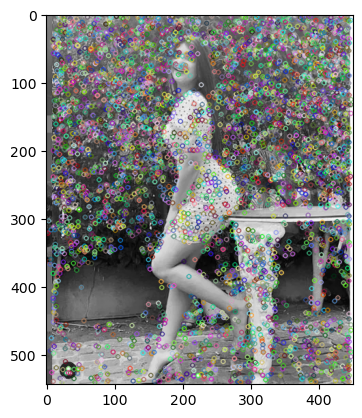

In [9]:
plt.imshow(image_with_keypoints)
print(image_with_keypoints.shape)

In [10]:
import cv2
import numpy as np

# Load reference and query images
reference_image = cv2.imread('ref.webp', cv2.IMREAD_GRAYSCALE)
query_image = cv2.imread('query.webp', cv2.IMREAD_GRAYSCALE)

# Create SIFT objects
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors for reference and query images
keypoints_ref, descriptors_ref = sift.detectAndCompute(reference_image, None)
keypoints_query, descriptors_query = sift.detectAndCompute(query_image, None)

# Create a brute-force matcher
bf = cv2.BFMatcher()

# Match descriptors using KNN (k-nearest neighbors)
matches = bf.knnMatch(descriptors_ref, descriptors_query, k=2)

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches on images
result_image = cv2.drawMatches(reference_image, keypoints_ref, query_image, keypoints_query, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the result
cv2.imshow('Image Matching Result', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
